## 1. Importing data and libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
df = pd.read_csv(r'C:\Users\madic\OneDrive\Documents\Achievement 6\01 Data\Original Data\Life-Expectancy-Data-Updated.csv', index_col = False)

In [4]:
%matplotlib inline

In [5]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkey,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [6]:
# Dropping categorical columns 
df_2 = df.drop(columns =['Country', 'Region'])

In [7]:
df_2.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


## 2.  Elbow technique 

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madic\anaconda3\lib\site-packages\sklearn\clust

[-821174000282.4117,
 -191995374417.24298,
 -107741034273.98698,
 -56971742720.29349,
 -37717330000.17105,
 -26381987966.509323,
 -18313361269.483078,
 -13827135836.099464,
 -9809586838.65049]

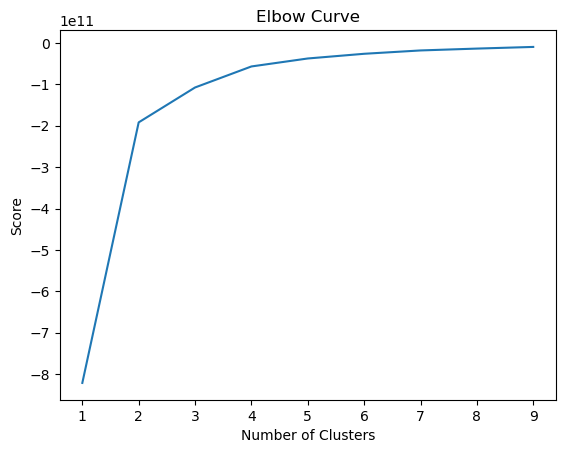

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a jump between 2 and 3 clusters and the curve starts to even out at 3 clusters. For that reason, I will use 3 clusters. 

## 3. K means clustering 

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df_2.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,clusters
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,2
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,0
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,2
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,2
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,0


In [15]:
df_2['clusters'].value_counts()

2    2379
0     425
1      60
Name: clusters, dtype: int64

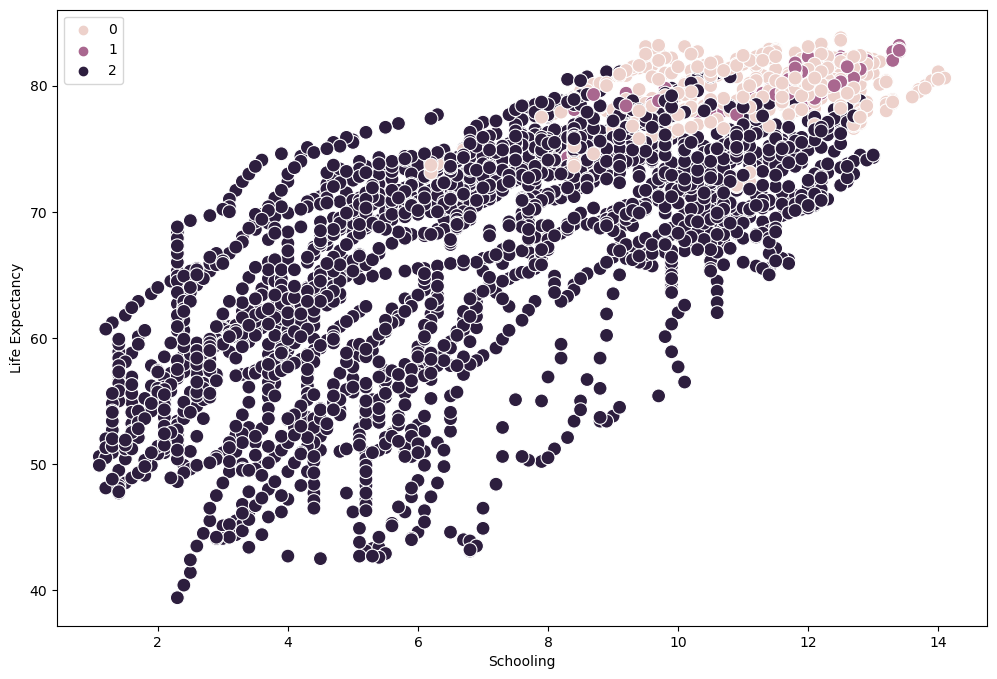

In [16]:
# Plot the clusters for the "Life Expectancy" and "Schooling" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Schooling'], y=df_2['Life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Schooling') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

This cluster looks a bit messy to me and difficult to interpret. The majority of points fall into the light pink cluster which includes up to 13 years of schooling and a life expectancy of 80. The dark and medium purple show generally higher years of schooling and a higher life expectancy. 

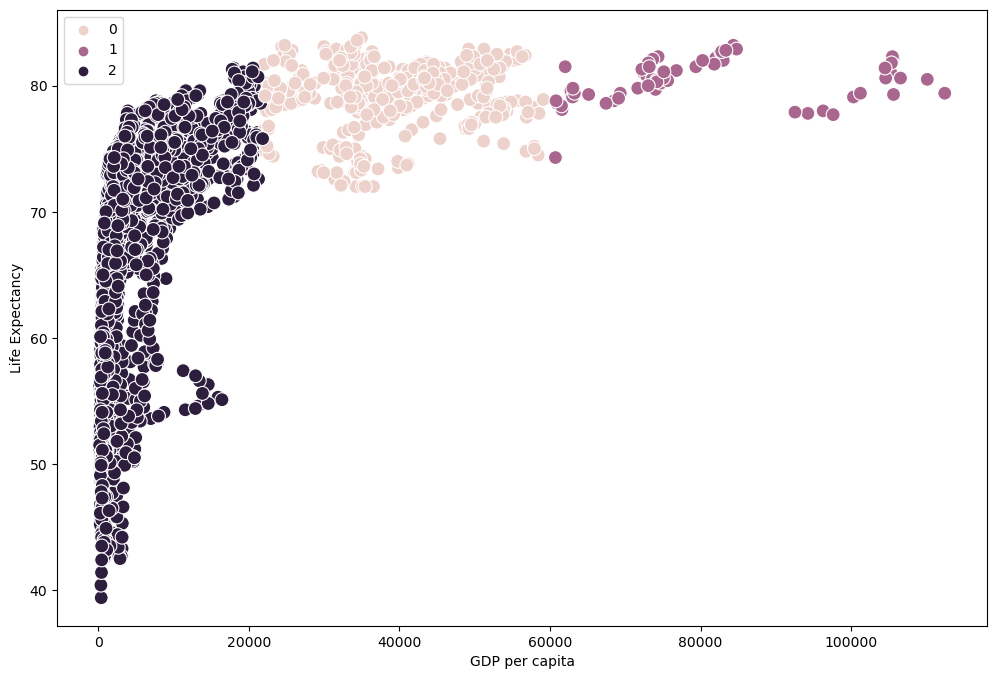

In [17]:
# Plot the clusters for the "GDP Per Capita" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['GDP_per_capita'], y=df_2['Life_expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Life Expectancy') 
plt.show()

This scatterplot broke up into more distinct clusters than the previous one. A low GDP per capita has life expectancies as low as 40 and as high as 80. The purple shows a mid range GDP per capita and mostly high life expectanies in the 70's and 80's. The dark purple shows the highest GDP per capita and all high life expectancy. This shows that there is a correlation between life expectancy and GDP per capita, though it is not linear, so this representation is probably more accurate. 

In [18]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [19]:
df_2.groupby('cluster').agg({'Schooling':['mean', 'median'], 
                         'GDP_per_capita':['mean', 'median'], 
                         'Life_expectancy':['mean', 'median']})

Schooling        GDP_per_capita          Life_expectancy       
                  mean median           mean   median            mean median
cluster                                                                     
dark purple   6.934847   7.00    4876.791089   3079.0       66.726314  69.50
pink         10.971529  11.30   39124.647059  38785.0       79.157647  79.80
purple       11.625000  11.95   80389.133333  74874.5       80.331667  80.45

The dark purple has the highest mean and median in all categories, while the purple is in the middle, and the pink is the lowest. 

These results help to better show the correlation between GDP per capita and Life Expectancy, since it is not a linear relationship. Knowing more about this relationship could help predict other values in the future. 

In [21]:
path = r'C:\Users\madic\OneDrive\Documents\Achievement 6'

In [22]:
df_2.to_csv(os.path.join(path, '01 Data','Prepared Data', 'clusters.csv'))